In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread("Nama.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

In [3]:
# Merah
lower_red1 = np.array([0, 100, 100])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([160, 100, 100])
upper_red2 = np.array([180, 255, 255])
mask_red = cv2.bitwise_or(cv2.inRange(hsv, lower_red1, upper_red1),
                          cv2.inRange(hsv, lower_red2, upper_red2))

# Hijau
lower_green = np.array([40, 100, 100])
upper_green = np.array([80, 255, 255])
mask_green = cv2.inRange(hsv, lower_green, upper_green)

# Biru
lower_blue = np.array([100, 100, 100])
upper_blue = np.array([140, 255, 255])
mask_blue = cv2.inRange(hsv, lower_blue, upper_blue)


In [4]:
# Fungsi perbaikan dengan deteksi latar putih menggunakan threshold
def highlight_non_color_text(mask_color):
    result = np.ones_like(img_rgb) * 255  # background putih
    
    # Deteksi background putih "cukup terang" (bukan teks)
    white_bg_mask = np.all(img_rgb >= [180, 180, 180], axis=-1)
    
    # Teks non-target adalah piksel yang:
    # - Tidak terdeteksi warna target (mask_color == 0)
    # - Bukan background putih
    text_mask = np.logical_and(mask_color == 0, ~white_bg_mask)
    
    # Buat teks jadi hitam
    result[text_mask] = [0, 0, 0]
    
    return result


In [5]:
# Gambar hasil
highlight_blue = highlight_non_color_text(mask_blue)
highlight_red = highlight_non_color_text(mask_red)
highlight_green = highlight_non_color_text(mask_green)

In [6]:
# Tampilkan hasil dalam layout 2x2
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

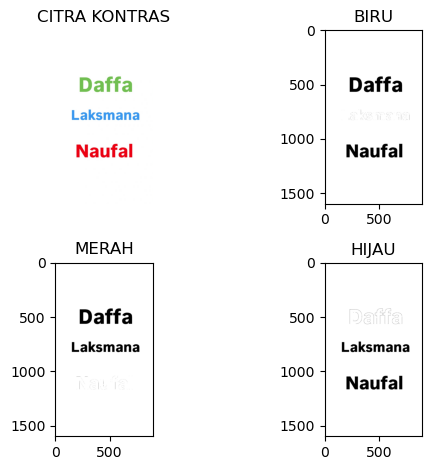

In [7]:
# Citra asli
plt.subplot(2, 2, 1)
plt.imshow(img_rgb)
plt.title("CITRA KONTRAS")
plt.axis('off')

# Biru
plt.subplot(2, 2, 2)
plt.imshow(highlight_blue)
plt.title("BIRU")
plt.axis('on')

# Merah
plt.subplot(2, 2, 3)
plt.imshow(highlight_red)
plt.title("MERAH")
plt.axis('on')

# Hijau
plt.subplot(2, 2, 4)
plt.imshow(highlight_green)
plt.title("HIJAU")
plt.axis('on')

plt.tight_layout()
plt.show()

In [8]:
# Load gambar dan ubah ke format RGB dan HSV
img_bgr = cv2.imread('NamaDiri.jpg')
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)

In [9]:
# Fungsi threshold warna dalam HSV
def extract_color_mask(lower_hsv, upper_hsv):
    mask = cv2.inRange(img_hsv, lower_hsv, upper_hsv)
    filtered = cv2.bitwise_and(img_rgb, img_rgb, mask=mask)
    gray = cv2.cvtColor(filtered, cv2.COLOR_RGB2GRAY)
    _, binary = cv2.threshold(gray, 10, 255, cv2.THRESH_BINARY)
    return binary

In [10]:
# Rentang warna HSV
hsv_ranges = {
    'BLUE': ([100, 50, 50], [130, 255, 255]),
    'RED': ([0, 70, 50], [10, 255, 255]),
    'GREEN': ([40, 40, 40], [90, 255, 255])
}

In [11]:

# Thresholding per warna
masks = {
    'NONE': np.zeros_like(img_rgb[:, :, 0]),  # Hitam polos
    'BLUE': extract_color_mask(np.array(hsv_ranges['BLUE'][0]), np.array(hsv_ranges['BLUE'][1])),
    'RED': extract_color_mask(np.array(hsv_ranges['RED'][0]), np.array(hsv_ranges['RED'][1])),
    'GREEN': extract_color_mask(np.array(hsv_ranges['GREEN'][0]), np.array(hsv_ranges['GREEN'][1]))
}

In [12]:
# Gabungan threshold
masks['RED-BLUE'] = cv2.bitwise_or(masks['RED'], masks['BLUE'])
masks['RED-GREEN-BLUE'] = cv2.bitwise_or(masks['RED-BLUE'], masks['GREEN'])

In [13]:
# Daftar nama yang akan ditampilkan
display_keys = ['NONE', 'BLUE', 'RED-BLUE', 'RED-GREEN-BLUE']

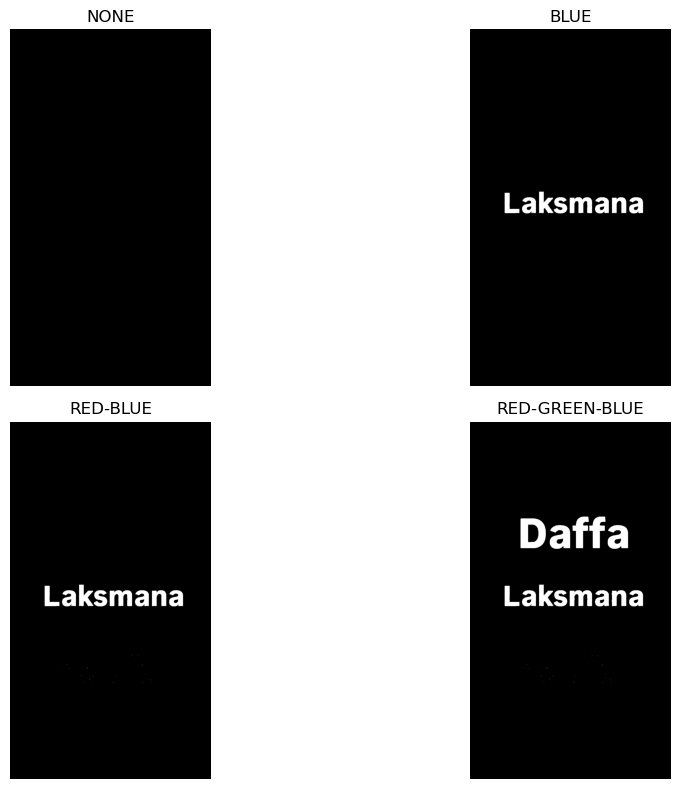

In [14]:
# Plot hasil 2x2
plt.figure(figsize=(12, 8))
for idx, key in enumerate(display_keys):
    plt.subplot(2, 2, idx + 1)
    plt.imshow(masks[key], cmap='gray')
    plt.title(key)
    plt.axis('off')
plt.tight_layout()
plt.show()

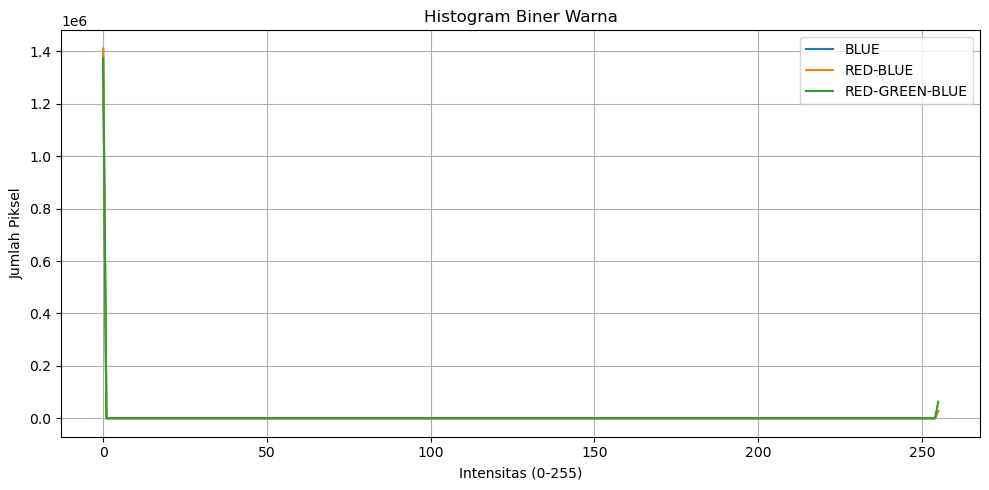

In [15]:
# Plot histogram masing-masing hasil
plt.figure(figsize=(10, 5))
for key in display_keys[1:]:  # Skip 'NONE'
    hist = cv2.calcHist([masks[key]], [0], None, [256], [0, 256])
    plt.plot(hist, label=key)
plt.title('Histogram Biner Warna')
plt.xlabel('Intensitas (0-255)')
plt.ylabel('Jumlah Piksel')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [16]:
# Membaca gambar dan konversi ke RGB
original = cv2.imread('Foto.jpg')  # Ganti path sesuai lokasi file
rgb_image = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)

In [17]:
# Konversi ke grayscale
gray_image = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)

In [18]:
# Fungsi peningkatan kecerahan dan kontras
increase_brightness = lambda img, val=50: cv2.add(img, val)
equalize_contrast = lambda img: cv2.equalizeHist(img)

In [19]:
# Membuat variasi hasil
results = {
    "Gambar Asli (RGB)": rgb_image,
    "Grayscale": gray_image,
    "Grayscale + Brightness": increase_brightness(gray_image),
    "Grayscale + Contrast": equalize_contrast(gray_image),
    "Grayscale + Brightness + Contrast": equalize_contrast(increase_brightness(gray_image))
}

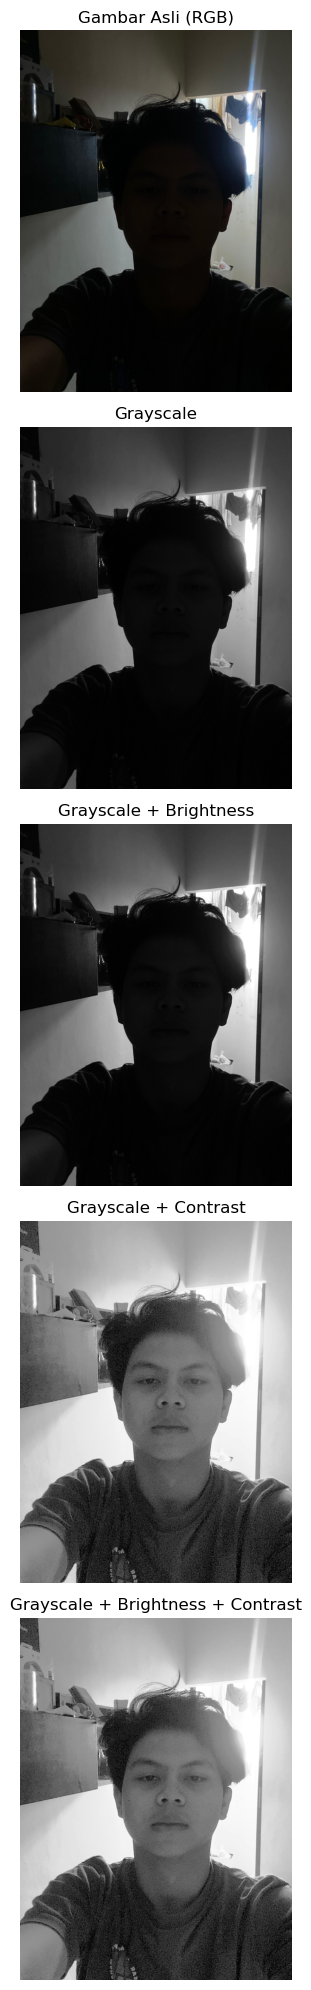

In [20]:
# Menampilkan hasil secara vertikal
plt.figure(figsize=(6, 20))
for idx, (title, img) in enumerate(results.items()):
    plt.subplot(len(results), 1, idx + 1)
    plt.imshow(img, cmap='gray' if len(img.shape) == 2 else None)
    plt.title(title)
    plt.axis('off')

plt.tight_layout()
plt.show()